In [72]:
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import numpy as np
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
import face_recognition
import matplotlib.image as plti
import cv2
print("I'm ready to go")

I'm ready to go


In [73]:
obama_1 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/Obama_1.jpg")# train
obama_2 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/obama_2.jpg")#test
putin_1 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/Putin_1.jpg")
putin_2 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/Putin_2.jpg")#
sarko_1 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/Sarkozy_1.jpg")
sarko_2 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/Sarkozy_2.jpg")
sarko_3 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/Sarkozy_3.jpeg")
sarko_4 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/Sarkozy_4.jpeg")
markel_1 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/Angela-Merkel_1.jpg")


putin_enco_1 = face_recognition.face_encodings(putin_1)[0] #encode your image in a vector
putin_enco_2 = face_recognition.face_encodings(putin_2)[0] #encode your image in a vector
obama_enco_1 = face_recognition.face_encodings(obama_1)[0] #encode your image in a vector
obama_enco_2 = face_recognition.face_encodings(obama_2)[0] #encode your image in a vector
markel_enco_1 = face_recognition.face_encodings(markel_1)[0]
sarko_enco_1 = face_recognition.face_encodings(sarko_1)[0]
sarko_enco_2 = face_recognition.face_encodings(sarko_2)[0]


# Known faces (Train)

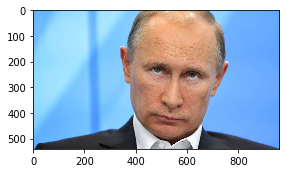

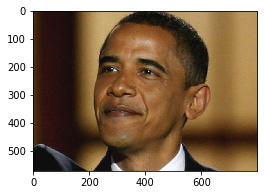

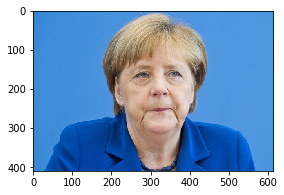

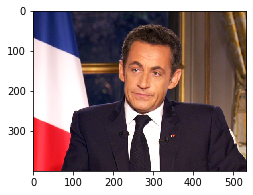

In [77]:
known_faces = [putin_1,obama_1,markel_1,sarko_1]
for i in range(0,len(known_faces)):
    plt.figure(figsize=(15,10))
    plt.subplot(3,3,3+i)
    plt.imshow(known_faces[i])

# known faces encoded

In [78]:
all_enco_known = [putin_enco_1,obama_enco_1,markel_enco_1,sarko_enco_1]

# unknown faces

In [79]:
#look for the known faces

NOT the face
Is the face matching: [True]
The Actual face is:
NOT the face
NOT the face


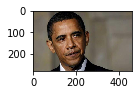

In [86]:
#compare the face
for i in range(0,len(all_enco_known)):
    result = face_recognition.compare_faces([all_enco_known[i]],obama_enco_2)
    if result[0]==True:
        print("Is the face matching:",result)
        print("The Actual face is:")
        plt.subplot(2,3,2+i)
        plt.imshow(known_faces[i])
        plt.imshow(obama_2)
    else:
        print("NOT the face")
        #plt.imshow(putin_enco_2)

In [109]:
def GetThePic(picture1,picture2):
    pic1_enco = face_recognition.face_encodings(picture1)[0]
    pic2_enco = face_recognition.face_encodings(picture2)[0]
    results = face_recognition.compare_faces([pic1_enco], pic2_enco)
    if results[0]==True:
        print("Is the face matching:",results)
        print("The Actual face is:")
        plt.figure(figsize=(20,12))
        plt.subplot(2,2,3)
        plt.imshow(picture1)
        print("the other face is: ")
        plt.imshow(picture2)
    else:
        print("NOT the face")
        plt.imshow(picture2)

Is the face matching: [True]
The Actual face is:
the other face is: 


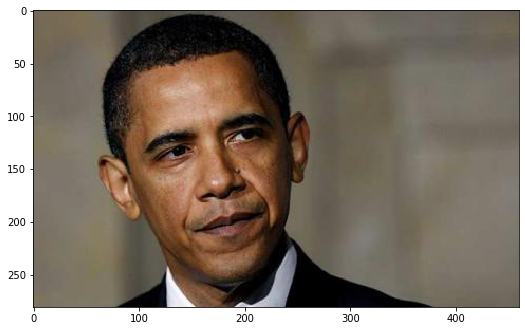

In [110]:
GetThePic(obama_1,obama_2)

In [9]:
#compare the face
for i in range(0,len(all_enco_known)):
    result = face_recognition.compare_faces([all_enco_known[i]],obama_enco_2)
    distance = face_recognition.face_distance([all_enco_known[i]],obama_enco_2)
    if result[0]==True:
        print("Is the face matching:",result)
        print("The Actual face is:")
        #plt.imshow(Image.fromarray(obama_enco_2))
        print(distance)
        
    else:
        print("NOT the face")
        #plt.imshow(putin_enco_2)

NOT the face
Is the face matching: [True]
The Actual face is:
[0.44840688]
NOT the face
NOT the face


# Unkown Faces (test)

In [49]:
train_faces=[]
obama_2=train_faces.append(obama_2)
putin_2=train_faces.append(putin_2)
sarko_1=train_faces.append(sarko_2)

In [50]:
"Function to encode faces "
all_encod=[]
def encodeFace(faces):
    enco = face_recognition.face_encodings(np.array(faces))[0]
    print(enco)
    all_encod.append(enco)

In [51]:
# encode all the faces
encoded_train_faces=[]
for i in range(len(train_faces)):
    enco = face_recognition.face_encodings(train_faces[i])
    encoded_train_faces.append(enco)

In [52]:
encoded_train_faces = np.array(encoded_train_faces)

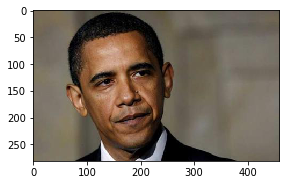

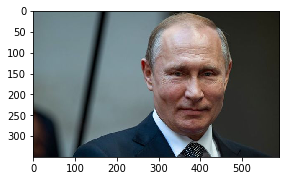

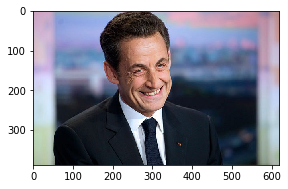

In [53]:
for i in range(0,len(train_faces)):
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,3+i)
    plt.imshow(train_faces[i])

# Face detection

# Multifaces

In [118]:
g8 = face_recognition.load_image_file("/Users/pm3796gb/Desktop/Faces/summit-G8.jpg")

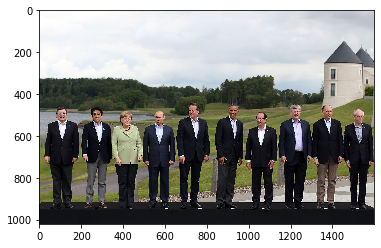

In [119]:
plt.imshow(g8)

In [120]:
pr_face=[]
pr=face_recognition.face_locations(g8)
pr_face.append(pr)
pr_face

[[(463, 751, 506, 708),
  (468, 947, 511, 904),
  (487, 295, 530, 252),
  (482, 132, 526, 88),
  (506, 443, 550, 400),
  (473, 1250, 516, 1207),
  (464, 1414, 516, 1362),
  (492, 1557, 535, 1514),
  (499, 1080, 550, 1028),
  (502, 592, 545, 549)]]

In [121]:
len(pr_face[0])

10

In [129]:
for faces in pr:
    top,right,bottom,left= faces
    face_image = g8[top:bottom,left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

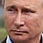

In [124]:
len(pr)

10

In [127]:
pr

[(463, 751, 506, 708),
 (468, 947, 511, 904),
 (487, 295, 530, 252),
 (482, 132, 526, 88),
 (506, 443, 550, 400),
 (473, 1250, 516, 1207),
 (464, 1414, 516, 1362),
 (492, 1557, 535, 1514),
 (499, 1080, 550, 1028),
 (502, 592, 545, 549)]